**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment,<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbour<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('House.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.view.unique(),df.waterfront.unique(),df.condition.unique(),df.grade.unique()

(array([0, 3, 4, 2, 1]),
 array([0, 1]),
 array([3, 5, 4, 1, 2]),
 array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1]))

In [7]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1204,7683800192,20141107T000000,179950.0,3,1.00,960,10125,1.0,0,0,...,7,960,0,1952,0,98003,47.3335,-122.305,1250,9769
8905,5282200015,20150126T000000,840000.0,5,3.00,2750,3800,1.5,0,0,...,7,1750,1000,1926,0,98115,47.6845,-122.313,1900,3800
11164,2436700800,20140516T000000,620000.0,3,2.25,1720,4000,1.5,0,0,...,7,1450,270,1921,0,98105,47.6683,-122.286,1410,4000
14007,5056500210,20141007T000000,539950.0,4,2.75,2910,9000,1.0,0,0,...,8,2130,780,1966,0,98006,47.5440,-122.176,1970,9000
20357,9492500170,20140723T000000,879950.0,4,2.75,3020,7203,2.0,0,0,...,9,3020,0,2014,0,98033,47.6948,-122.178,3010,7215


We see that there are cases where the number of bedrooms < the number of bathrooms. We will try to remove such anomalies.<br>  
We also see that some of the bathroom numbers have decimal value.<br> 
Full Bathroom -->Adjoins the MasterBedroom and has Bathtub/Shower, Toilet, Sink<br> 
1/2 Bathroom --> Toilet and Sink<br> 
3/4 Bathroom --> Toilet, Sink and Shower<br> 

In [8]:
df1 = df[df.bathrooms<df.bedrooms+1]
df1.shape

(21523, 21)

In [9]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152300e+04,2.152300e+04,21523.000000,21523.000000,21523.000000,2.152300e+04,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000
mean,4.582575e+09,5.364137e+05,3.373182,2.106665,2072.109278,1.491133e+04,1.492403,0.007248,0.230544,3.410212,7.649073,1782.354365,289.754913,1970.941876,83.736422,98077.966454,47.559920,-122.214007,1983.373089,12677.102727
std,2.877437e+09,3.528906e+05,0.926401,0.755480,897.314099,4.018183e+04,0.539104,0.084828,0.759172,0.651078,1.164766,814.459780,438.252041,29.367106,400.164646,53.515275,0.138682,0.140738,681.181839,26562.518120
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.210000e+05,3.000000,1.500000,1420.000000,5.042500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.231000,1840.000000,7620.000000
75%,7.312200e+09,6.405000e+05,4.000000,2.500000,2540.000000,1.065100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2209.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10078.000000
max,9.900000e+09,7.062500e+06,33.000000,7.500000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Max value of bedroom = 33.<br>
This is clearly an outlier. Let's get rid of it.

In [10]:
df2 = df1[df1['bedrooms']!=33]

In [11]:
df2[df2.sqft_living>df2.sqft_lot].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
63,9528102996,20141207T000000,549000.0,3,1.75,1540,1044,3.0,0,0,...,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
116,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
175,7234600798,20150210T000000,425000.0,3,2.50,1120,1100,2.0,0,0,...,8,820,300,2008,0,98122,47.6106,-122.310,1590,1795
406,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,...,9,720,350,2008,0,98106,47.5213,-122.357,1070,928


--> Area of **House**> Area of **Land** it is built on.<br>
We shall remove such datas.

In [12]:
df2 = df2[df2.sqft_living<df2.sqft_lot]

In [13]:
df2.shape

(20744, 21)

Let's see if the year a house was built on has any impact on it's average price. 

In [14]:
y = pd.DataFrame(df2.groupby('yr_built').price.mean())
y.reset_index(inplace=True)

In [15]:
y.head()

,yr_built,price
0,1900,566890.435294
1,1901,548969.357143
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444


<IPython.core.display.Javascript object>

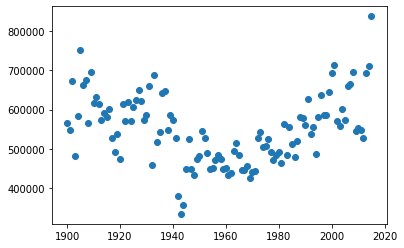

In [16]:
plt.scatter(y['yr_built'],y['price'])

There seems to be no coorelation between <b>yr_built</b> and **price**. We shall remove the column later. 

In [17]:
df3 = df2

In [18]:
df3[df3['bedrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


**We've got houses with 0 bathtooms and 0 bedrooms but multiple floors. Clearly these data points are anomalies. Let's get rid of them.**

In [19]:
#Select all datas where bedrooms !=0.
df3=df3[df3['bedrooms']!=0]

In [20]:
#Select all datas where bathrooms !=0.
df3=df3[df3['bathrooms']!=0]

In [21]:
df3.shape

(20734, 21)

In [22]:
df5=df3

In [23]:
df5.shape

(20734, 21)

In [24]:
df5[df5.price>1000000].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,20150311T000000,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,20140612T000000,1325000.0,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
70,1525059190,20140912T000000,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917


In [25]:
x=df5[(df5.price>1000000)&(df.sqft_lot<20000)].index

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [26]:
df5.drop([i for i in x],inplace=True)

In [27]:
df5.shape

(19648, 21)

In [28]:
df5[df5.price<100000].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
3108,1721801591,20150219T000000,89950.0,1,1.00,570,4080,1.0,0,0,...,5,570,0,1942,0,98146,47.5098,-122.334,890,5100
3321,2724200705,20141212T000000,95000.0,2,1.00,800,8550,1.0,0,0,...,7,800,0,1947,0,98198,47.4075,-122.294,1490,8550
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630


In [29]:
x = df5[(df5.price<100000)&(df.sqft_lot>5000)].index

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [30]:
x

Int64Index([  465,  2141,  3321,  3767,  3805,  5303,  5723,  8274, 10253,
            10585, 10770, 13756, 14581, 15293, 16198, 16714, 17580, 18468],
           dtype='int64')

In [31]:
df5.drop([i for i in x],inplace=True)

In [32]:
df5.shape

(19630, 21)

In [33]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<IPython.core.display.Javascript object>

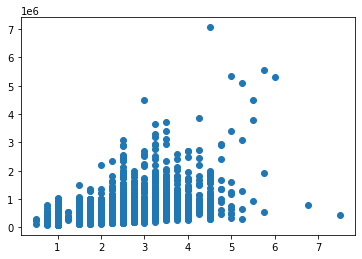

In [34]:
plt.scatter(df5['bathrooms'],df5['price'])

In [35]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]   
X=df5[features ]
y=df5['price']

In [37]:
X.corr()

,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
floors,1.000000,0.009456,-0.007888,0.227644,-0.295822,-0.003062,0.516414,0.355087,0.603741,0.468593,0.417138
waterfront,0.009456,1.000000,-0.032062,-0.017662,0.050562,0.365457,0.039122,0.052693,0.051367,0.051739,0.073890
lat,-0.007888,-0.032062,1.000000,-0.019577,0.106385,-0.023856,-0.016623,0.042058,-0.024281,0.083107,0.031135
bedrooms,0.227644,-0.017662,-0.019577,1.000000,0.290087,0.044077,0.534124,0.382316,0.470525,0.350956,0.589090
sqft_basement,-0.295822,0.050562,0.106385,0.290087,1.000000,0.208203,0.229968,0.123832,-0.146469,0.082516,0.369473
view,-0.003062,0.365457,-0.023856,0.044077,0.208203,1.000000,0.115652,0.199545,0.094598,0.160488,0.194435
bathrooms,0.516414,0.039122,-0.016623,0.534124,0.229968,0.115652,1.000000,0.570161,0.671914,0.631733,0.747786
sqft_living15,0.355087,0.052693,0.042058,0.382316,0.123832,0.199545,0.570161,1.000000,0.727430,0.713024,0.746118
sqft_above,0.603741,0.051367,-0.024281,0.470525,-0.146469,0.094598,0.671914,0.727430,1.000000,0.745986,0.865104
grade,0.468593,0.051739,0.083107,0.350956,0.082516,0.160488,0.631733,0.713024,0.745986,1.000000,0.742599


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred=regressor.predict(X_test)

In [42]:
y_pred.shape

(1963,)

In [43]:
from sklearn import metrics

In [44]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse

26983527125.12746

In [45]:
regressor.score(X_test,y_test)

0.6166989655987639

In [46]:
regressor.score(X_train,y_train)

0.6315086441021296

In [47]:
regressor.coef_

array([-2.47084872e+04,  6.37267155e+05,  6.11208704e+05, -1.93698064e+04,
        4.12490539e+01,  4.40295286e+04, -1.34195321e+04,  2.47435639e+01,
        5.49299000e+01,  6.23675364e+04,  9.61789549e+01])

In [48]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
floors,-24708.487241
waterfront,637267.154936
lat,611208.703858
bedrooms,-19369.806366
sqft_basement,41.249054
view,44029.528572
bathrooms,-13419.532059
sqft_living15,24.743564
sqft_above,54.929900
grade,62367.536388


Interpreting the coefficients:

- Holding all other features fixed, a <b>1</b> unit increase in <b>bathrooms</b> is associated with an decrease of <b>-13419.532059</b> in price.


In [49]:
from numpy import cov
covariance = cov(df5['bathrooms'],df5['price'])
print(covariance)

[[5.19044813e-01 8.80457864e+04]
 [8.80457864e+04 7.13379179e+10]]


<b>We see that there is a +ve correlation between bathrooms and prices. However, upon training the model, we find that house prices are decreasing as number of bathrooms are incereasing. This is because in a multivariate regression, it is possible that for effect of the intercorrelations between the independent variables of the partial regression coefficient of an independent variable may be negative in the face of a positive correlation coefficient between this variable and the dependent variable.</b>

Since an accuracy of 0.6166989655987639 is not as high as we would want it to be, we'll use **Regulation** techniques to improve on the accuracy. 

In [50]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.15) 
RigeModel.fit(X_train, y_train)
RigeModel.score(X_test, y_test)

0.616706614830284

Using **Rigid Regression** didn't improve the model's accuracy. So we will try with polynomial regression. 

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y_train)
lin_reg2.score(X_test_poly,y_test)

0.6900868571490419

Let's try Rigid Regression for this as well.

In [53]:
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(X_poly, y_train)
RigeModel.score(X_test_poly,y_test)

0.741588162771678

**NOTE**: Accuracy score is not a proper **Evaluation Metrics** for any type of regression models. They are mostly used in **classification** models.

In [54]:
prediction=RigeModel.predict(X_test_poly)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, and we want to minimize them.

In [55]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 91698.47177114878
MSE: 18191609710.09882


<IPython.core.display.Javascript object>

RMSE: 134876.2755643068
